In [1]:
import simulate

# Run simulation and get all the objects
sol = simulate.simulate(n_requests=10, coord_range=100, min_pickup_time=300, max_pickup_time=1000, pickup_time_window=30, velocity=1, num_vehicles=10, time_limit=2, use_time_windows=True)

# Extract the objects properly
manager = sol["manager"]
routing = sol["routing"]
time_dimension = sol["time_dimension"]
solution = sol["solution"]

# Now check node 2's time value
node = 2  # This is the node ID (not index)
index = manager.NodeToIndex(node)  # Convert node to index
time_var = time_dimension.CumulVar(index)
time_val = solution.Value(time_var)
print(f"Node {node} is visited at time: {time_val}")

# Let's also check what the route shows for this node
print("\nRoute information:")
for vehicle_id in range(routing.vehicles()):
    vehicle_index = routing.Start(vehicle_id)
    route_info = []
    while not routing.IsEnd(vehicle_index):
        current_node = manager.IndexToNode(vehicle_index)
        current_time_var = time_dimension.CumulVar(vehicle_index)
        current_time_val = solution.Value(current_time_var)
        route_info.append((current_node, current_time_val))
        vehicle_index = solution.Value(routing.NextVar(vehicle_index))
    
    # Check end node too
    end_node = manager.IndexToNode(vehicle_index)
    end_time_var = time_dimension.CumulVar(vehicle_index)
    end_time_val = solution.Value(end_time_var)
    route_info.append((end_node, end_time_val))
    
    # Check if node 2 is in this route
    for node_id, time_val in route_info:
        if node_id == node:
            print(f"Vehicle {vehicle_id}: Node {node_id} visited at time {time_val}")
            break


Solving DARP with 10 requests, 10 vehicles, time limit: 2s, time windows: enabled
Solution found in 2006.000 seconds
Solution found!
Vehicle 0 route (node, time, passengers): [(0, 0, 0), (17, 379, 0), (15, 410, 1), (16, 455, 2), (18, 523, 1), (11, 561, 0), (12, 608, 1), (13, 693, 0), (14, 779, 1), (0, 845, 0)]
Vehicle 1 route (node, time, passengers): [(0, 0, 0), (19, 411, 0), (20, 476, 1), (0, 515, 0)]
Vehicle 2 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehicle 3 route (node, time, passengers): [(0, 0, 0), (3, 378, 0), (4, 450, 1), (5, 461, 0), (6, 538, 1), (1, 746, 0), (9, 765, 1), (2, 839, 2), (7, 918, 1), (10, 963, 2), (8, 999, 1), (0, 1017, 0)]
Vehicle 4 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehicle 5 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehicle 6 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehicle 7 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehicle 8 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehi

## Example:  Solve a simple DARP with PYVRP

In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import simulate
problem_instance = simulate.generate_darp_instance(n_requests=10, coord_range=100, min_pickup_time=300, max_pickup_time=1000, pickup_time_window=30, velocity=1)

coordinates = problem_instance["coordinates"]
time_windows = problem_instance["time_windows"]
distance_matrix = problem_instance["distance_matrix"]

manager, routing, time_dimension, search_parameters  = simulate.create_darp_model(coordinates=coordinates, time_windows=None, distance_matrix=distance_matrix, num_vehicles=5, time_limit=5)

solution = routing.SolveWithParameters(search_parameters)

simulate.print_solution(manager, routing, time_dimension, solution)

solution.ObjectiveValue()

Solution found!
Vehicle 0 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehicle 1 route (node, time, passengers): [(0, 0, 0), (9, 36, 0), (17, 40, 1), (3, 87, 2), (4, 138, 3), (18, 154, 2), (10, 182, 1), (5, 201, 0), (7, 251, 1), (11, 265, 2), (6, 286, 3), (1, 321, 2), (8, 342, 3), (13, 369, 2), (12, 390, 3), (14, 408, 2), (15, 424, 1), (2, 441, 2), (16, 535, 1), (19, 574, 0), (20, 601, 1), (0, 614, 0)]
Vehicle 2 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehicle 3 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Vehicle 4 route (node, time, passengers): [(0, 0, 0), (0, 0, 0)]
Total distance (cost): 614
Number of served requests (pickup/dropoff pairs): 10


614

## Case 1: Solving N requests with time window

In [5]:
results = {}

In [5]:
from tqdm import tqdm
import json

n_experiments = 10

time_constraint_objs = []

for i in tqdm(range(n_experiments)):
    problem_instance = simulate.generate_darp_instance(n_requests=20, coord_range=100, min_pickup_time=300, max_pickup_time=1000, pickup_time_window=30, velocity=1)
    coordinates = problem_instance["coordinates"]
    time_windows = problem_instance["time_windows"]
    distance_matrix = problem_instance["distance_matrix"]

    manager, routing, time_dimension, search_parameters  = simulate.create_darp_model(coordinates, time_windows, distance_matrix, num_vehicles=10, time_limit=5)

    solution = routing.SolveWithParameters(search_parameters)

    obj = solution.ObjectiveValue()

    time_constraint_objs.append(obj)


print(time_constraint_objs)
results['spoiled_user'] = time_constraint_objs


100%|██████████| 10/10 [00:50<00:00,  5.00s/it]

[1712, 1607, 1614, 1710, 1696, 1648, 1651, 1574, 1706, 1647]


## Case 2: Solve DARP with full time assignment 

In [6]:
no_time_constraint_objs = []

for i in tqdm(range(n_experiments)):
    problem_instance = simulate.generate_darp_instance(n_requests=20)
    coordinates = problem_instance["coordinates"]
    time_windows = problem_instance["time_windows"]
    distance_matrix = problem_instance["distance_matrix"]

    manager, routing, time_dimension, search_parameters  = simulate.create_darp_model(coordinates=coordinates, time_windows=None, distance_matrix=distance_matrix, num_vehicles=10, time_limit=5)

    solution = routing.SolveWithParameters(search_parameters)

    obj = solution.ObjectiveValue()

    no_time_constraint_objs.append(obj)

results['stoic_user'] = no_time_constraint_objs
print(no_time_constraint_objs)



100%|██████████| 10/10 [00:50<00:00,  5.01s/it]

[969, 1027, 1088, 969, 1002, 1024, 1063, 1056, 918, 975]


## Case 3: Solving DARP with greedy time assignment (and random acceptance)

In [ ]:
# iteratively: consider a new request with no time constraint (by a probability), add to the model. and solve the model.
# If the new flex_time constraint is accepted, then it becomes fixed in the future iterations.
# For different number of requests:
# acceptance probability
import random 

from tqdm import tqdm
import json 
n_experiments = 10
# Acceptance rate
for p in [0.75, 0.5, 0.25]:

    greedy_obj = []

    for i in tqdm(range(n_experiments)):

        # Initiate the problem instance
        problem_instance = simulate.generate_darp_instance(n_requests=20)
        coordinates = problem_instance["coordinates"]
        time_windows = problem_instance["time_windows"]
        distance_matrix = problem_instance["distance_matrix"]

        time_windows_j = None

        # Consider the first 10 requests, incoming 11st become flexible, accepted with a probability
        for j in range(10,20):
            #extract the problem instance between 0 and j-1, plus the new j request being
            coordinates_j = coordinates[:j+1]
            # probability of changing the time window is p
            r = random.SystemRandom().random()
            if r < p:
                if not time_windows_j:
                    time_windows_j = time_windows[:j] + [(300,1000)]
                else:
                    time_windows_j = time_windows_j + [(300,1000)]
            else:
                if not time_windows_j:
                    time_windows_j = time_windows[:j] + [time_windows[j]]
                else:
                    time_windows_j = time_windows_j + [time_windows[j]]
    

            distance_matrix_j = distance_matrix[:2*j+3, :2*j+3]
            # Solve the problem instance

            manager, routing, time_dimension, search_parameters  = simulate.create_darp_model(coordinates=coordinates_j, time_windows=time_windows_j, distance_matrix=distance_matrix_j, num_vehicles=10, time_limit=5)

            solution = routing.SolveWithParameters(search_parameters)

            jth_pickup_node = manager.NodeToIndex(2*j+1)
            jth_dropoff_node = manager.NodeToIndex(2*j+2)

            pickup_time_var = time_dimension.CumulVar(jth_pickup_node)
            pickup_time_val = solution.Value(pickup_time_var)

            dropoff_time_var = time_dimension.CumulVar(jth_dropoff_node)
            dropoff_time_val = solution.Value(dropoff_time_var)

            # Update the time window of the jth request 
            time_windows_j = time_windows_j[:j] + [(pickup_time_val-15, pickup_time_val+15)]

            print(f"New Pickup Time for {j}:" + str([(pickup_time_val-15, pickup_time_val+15)]))
        
        print("time_windows_j: ", time_windows_j)
        print("coordinates_j: ", coordinates_j)
        print("distance_matrix_j: ", distance_matrix_j)
        
        manager, routing, time_dimension, search_parameters  = simulate.create_darp_model(coordinates=coordinates_j, time_windows=time_windows_j, distance_matrix=distance_matrix_j, num_vehicles=10, time_limit=10)
        
        solution = routing.SolveWithParameters(search_parameters)

        obj = solution.ObjectiveValue()

        greedy_obj.append(obj)
        
        print(obj)
        print("--------------------------------")

    print(greedy_obj)
    results[f"acceptance_rate_{p}"] = greedy_obj





In [7]:
# Load data from json file
#json.dump(results, open("results_comparison.json", "w"))
with open("results_comparison.json", "r") as f:
    all_results = json.load(f)


## Compare the performance

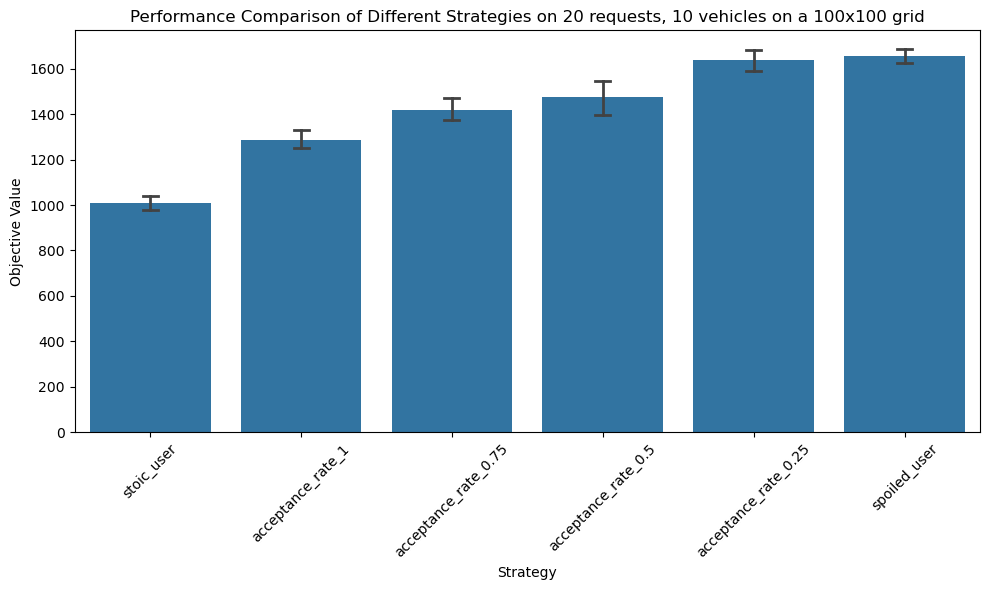

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization
data = []
for strategy, values in all_results.items():
    for value in values:
        data.append({'Strategy': strategy, 'Objective Value': value})

df = pd.DataFrame(data)

# Define the desired order for x-axis labels
strategy_order = ['stoic_user', 'acceptance_rate_1', 'acceptance_rate_0.75', 'acceptance_rate_0.5', 'acceptance_rate_0.25', 'spoiled_user']

# Create bar plot with whiskers
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Strategy', y='Objective Value', order=strategy_order, capsize=0.1, err_kws={'linewidth': 2})
plt.title('Performance Comparison of Different Strategies on 20 requests, 10 vehicles on a 100x100 grid')
plt.ylabel('Objective Value')
plt.xlabel('Strategy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
